In [1]:
import arviz as az
import matplotlib.pyplot as plt
from fitting import FitModel

In [2]:
params = {}
params['core_shell'] = { 'Li': False, 'Ni': False, 'O': True }
params['charges'] = {'Li': +1.0,
                     'Ni': +3.0,
                     'O': {'core':  +0.960,
                           'shell': -2.960}}
params['masses'] = {'Li': 6.941,
                    'Ni': 58.6934,
                    'O': {'core': 15.0,
                          'shell': 1.0} }

params['bpp'] = {'Li-O' : [632.1018, 0.2906, 0.0],
                 'Ni-O' : [1582.5000, 0.2882, 0.000],
                 'O-O'  : [22764.3000, 0.1490, 21.7]}

params['sd'] = {'Li-O' : [50, 0.01, 0.01],
                'Ni-O' : [60, 0.01, 0.01],
                'O-O'  : [60, 0.01, 5]}

params['cs_springs'] = {'O' : [65.0, 0.0]}

excude_from_fit = ['Li_O_c','Ni_O_c']

In [3]:
fit_data = FitModel.collect_info(params)

Found elements: ['Li', 'Ni', 'O']


In [4]:
trace = fit_data.run_fit(excude_from_fit, epsilon=0.1, draws=1000)

Sample initial stage: ...
/Users/lmm82/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pymc3/step_methods/smc.py:176: UserWarning: Warning: SMC-ABC methods are experimental step methods and not yet recommended for use in PyMC3!
  warnings.warn(EXPERIMENTAL_WARNING)
Stage: 0 Beta: 0.050 Steps: 25
Stage: 1 Beta: 0.172 Steps: 18
Stage: 2 Beta: 0.406 Steps: 2
Stage: 3 Beta: 0.774 Steps: 13
Stage: 4 Beta: 1.000 Steps: 3


/Users/lmm82/.pyenv/versions/3.7.3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:56: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  chain_likelihoods.append(np.stack(log_like))


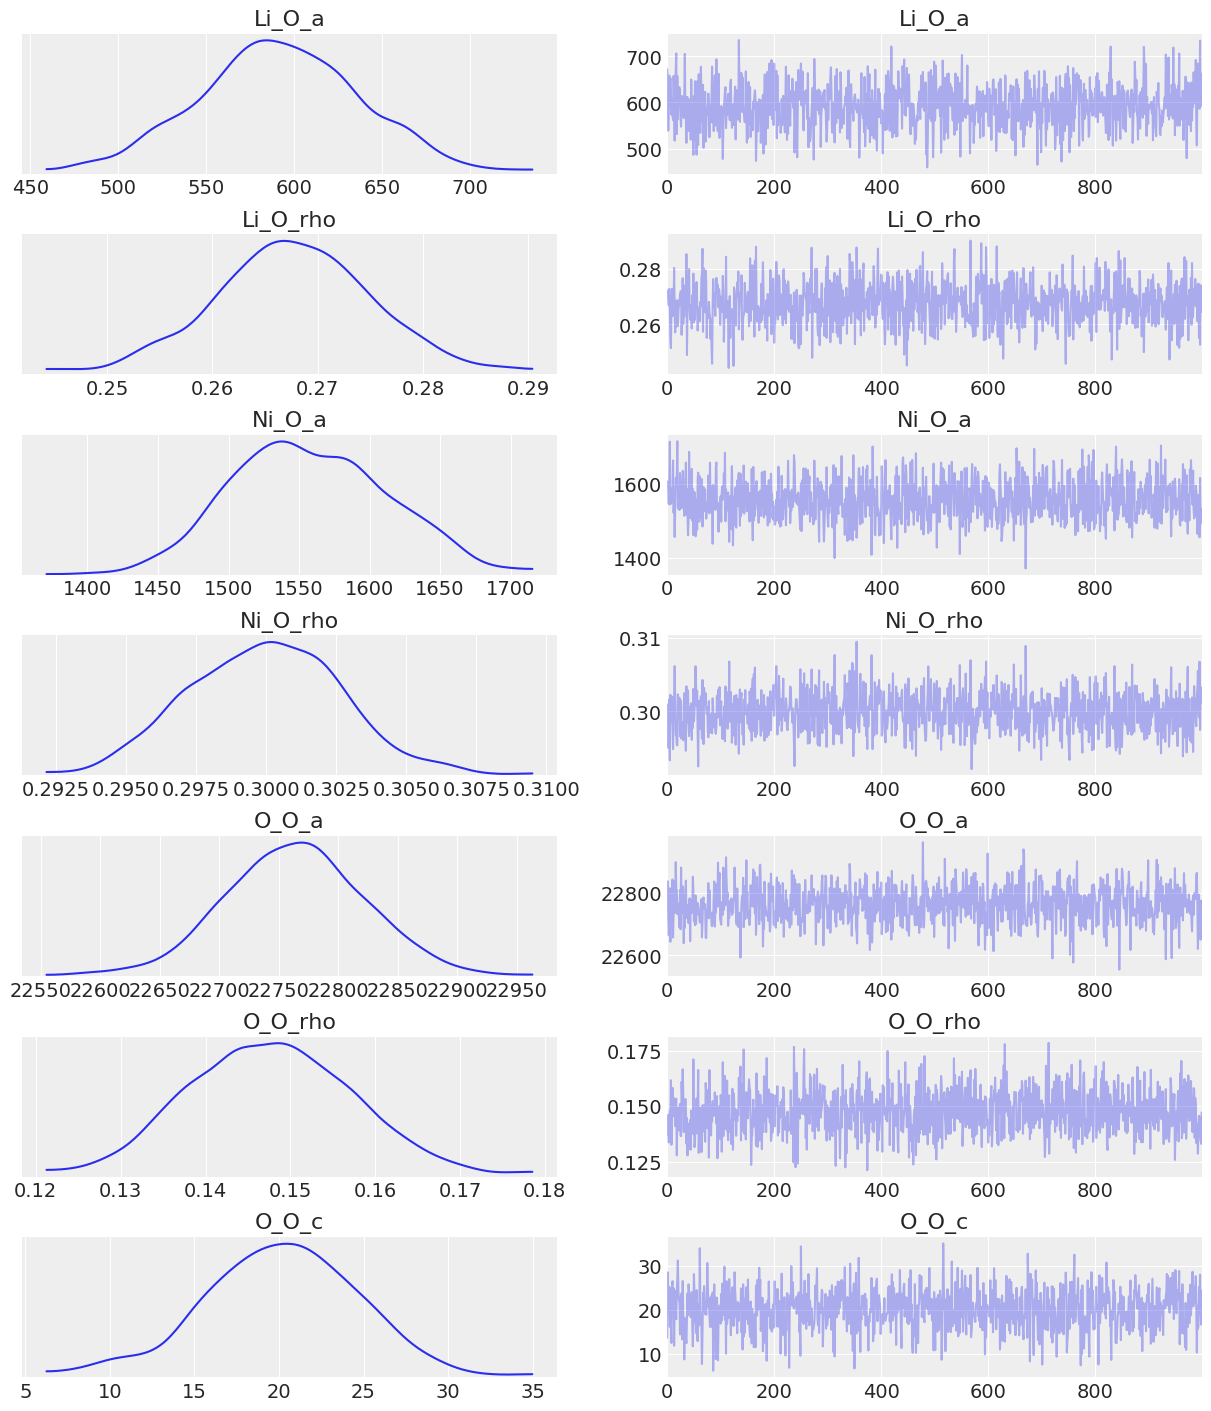

In [5]:
az.style.use('arviz-darkgrid')
az.plot_trace(trace)
plt.savefig('coreshell_LiNiO2_trace2.png',dpi=500, bbox_inches = "tight")

/Users/lmm82/.pyenv/versions/3.7.3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:56: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  chain_likelihoods.append(np.stack(log_like))


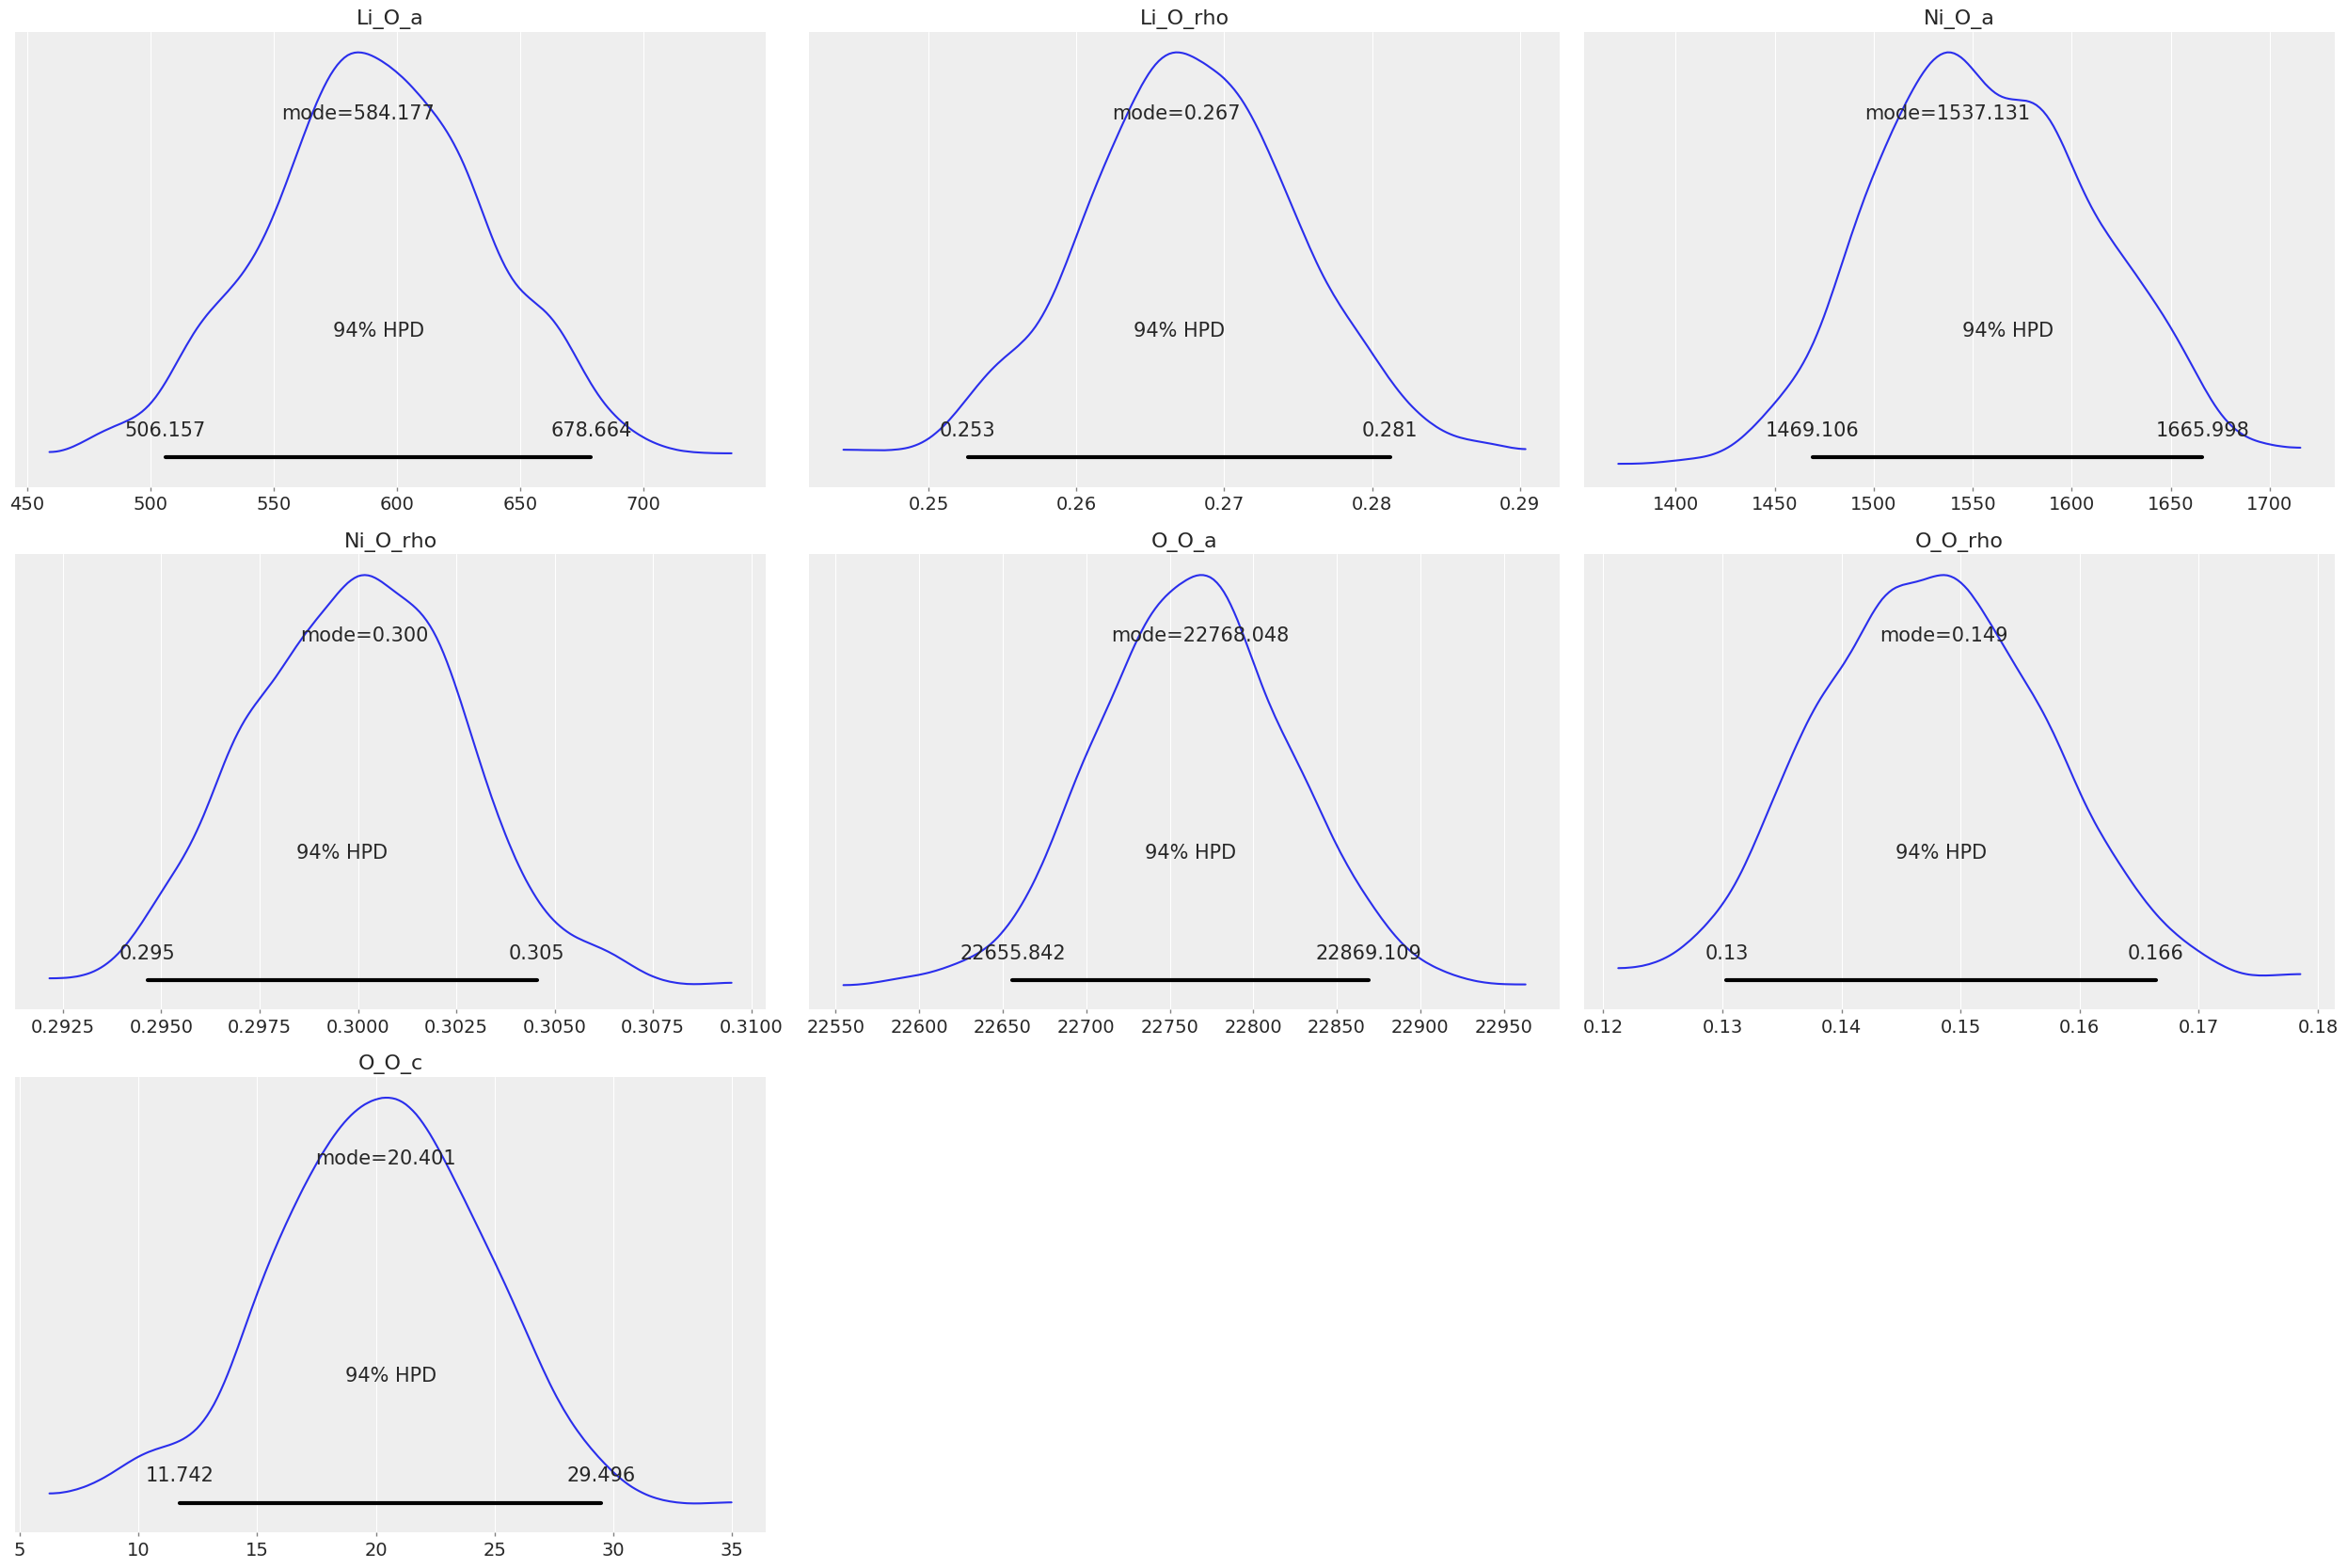

In [6]:
az.plot_posterior(trace, round_to = 3, point_estimate = 'mode')
plt.savefig('coreshell_LiNiO2_mode2.png',dpi=500, bbox_inches = "tight")

In [ ]:
# fig, axes = az.plot_forest(trace,
#                            kind='ridgeplot',
#                            var_names=['Li_O_rho','Ni_O_rho', 'O_O_rho'],
#                            combined=True,
#                            ridgeplot_overlap=10,
#                            colors='white',
#                            figsize=(9, 7))

In [ ]:
# pm.summary(trace)

In [ ]:
# # ALTERNATIVE TO VASPPY
# from pymatgen.io.vasp.outputs import Outcar
# def get_forces(outcar):
#     data = outcar.read_table_pattern(header_pattern=r"\sPOSITION\s+TOTAL-FORCE \(eV/Angst\)\n\s-+",
#                                      row_pattern=r"\s+[+-]?(\d+\.\d+)\s+[+-]?(\d+\.\d+)\s+[+-]?(\d+\.\d+)\s+([+-]?\d+\.\d+)\s+([+-]?\d+\.\d+)\s+([+-]?\d+\.\d+)",
#                                      footer_pattern=r"\s--+",
#                                      postprocess=lambda x: float(x),
#                                      last_one_only=False)
#     forces = []
#     for atom_data in data[-1]:
#         xyz_force = atom_data[3:]
#         forces.append(xyz_force)
#     return forces
# outcar = Outcar("OUTCAR")
# forces = get_forces(outcar)